# multiscale model fitting for Toy3a



### start with initalizing many things

In [1]:
# imports
import os
import sys
import torch
# import pickle
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
# import time
import math

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
# import torch_cae_multilevel_V4 as net
import ResNet as tnet
import utils

reloaded
using new ResNet thing


In [2]:
# paths
data_dir = '../data/toy3b'
model_dir = '../model/toy3b'
result_dir = '../result/toy3b'

#load data
train_data = torch.tensor(np.load(os.path.join(data_dir, 'train_data.npy')))
val_data = torch.tensor(np.load(os.path.join(data_dir, 'val_data.npy')))
test_data = torch.tensor(np.load(os.path.join(data_dir, 'test_data.npy')))

data_of_sizes = {}
current_size = 1
unresolved_dict = {}
model_keep = list()
model_used_dict = {}


In [3]:

train_dict = utils.make_dict_all_sizes(train_data)
val_dict = utils.make_dict_all_sizes(val_data)

i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
i =  2
Transforming
reshape to print
i =  3
Transforming
reshape to print
i =  4
Transforming
reshape to print
i =  5
Transforming
reshape to print
i =  6
Transforming
reshape to print
dict_keys(['128', '64', '32', '16', '8', '4', '2', '1'])
i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
i =  2
Transforming
reshape to print
i =  3
Transforming
reshape to print
i =  4
Transforming
reshape to print
i =  5
Transforming
reshape to print
i =  6
Transforming
reshape to print
dict_keys(['128', '64', '32', '16', '8', '4', '2', '1'])


In [23]:
# import ResNet as tnet
current_size = 1
print(train_dict[str(current_size)].shape)
print(val_dict[str(current_size)].shape)
models, step_sizes, mse_list, idx_lowest,n_forward_list = utils.find_best_timestep(train_dict[str(current_size)], 
                                                              val_dict[str(current_size)], 
                                                              val_dict[str(current_size)], current_size,model_dir=model_dir,# make_new=True, #print_every=100, 
                                                             start_k = 2,largest_k = 3)#, dont_train = False)

torch.Size([100, 500, 1, 1])
torch.Size([10, 500, 1, 1])
inside train_one_timestep
model loaded:  model_L1_D4_noise0.pt
Model not trained more


4
step_sizes =  [4]
mse =  [0.0002418020472759963]
y_preds[i] shape =  (122,)


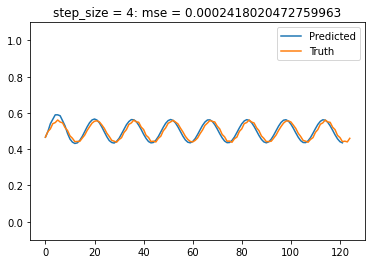

In [24]:
import ResNet as tnet

print(step_sizes[idx_lowest])    
print("step_sizes = ", step_sizes)
print("mse = ", mse_list)
utils.plot_lowest_error(models[idx_lowest], i =0, title="step_size = " +str(step_sizes[idx_lowest]))

# print(train_data.shape)
# dataset = tnet.DataSet(torch.flatten(train_data, 2,3), torch.flatten(val_data, 2,3), 
#                        torch.flatten(val_data, 2,3), 1, step_sizes[idx_lowest], 5)
# dataset.plot_val_data()

torch.Size([10, 500, 1, 1])
tensor(8.2366e-05)


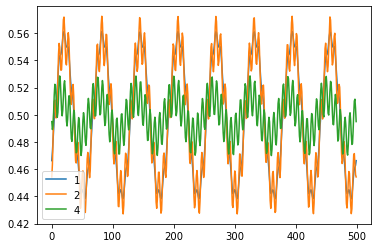

In [29]:
print(val_dict['1'].shape)
plt.plot(val_dict['1'][0,:,0,0], label = '1')
plt.plot(val_dict['2'][0,:,0,0], label = '2')

# plt.ylim([0,1])
mse = torch.mean((val_dict['2'][:,:,0,0] - val_dict['1'][:,:,0,0])**2)
print(mse)
plt.plot(train_dict['4'][0,:,0,0], label = '4')
plt.legend()
# plt.plot(train_dict['8'][0,:,0,0])
# plt.plot(train_dict['16'][0,:,0,0])
# plt.plot(train_dict['32'][0,:,0,0])
# plt.plot(train_dict['64'][0,:,0,0])
# plt.plot(train_dict['128'][0,:,0,0])
# plt.plot(np.cos(np.arange(500)/32*np.pi)/4+.5)

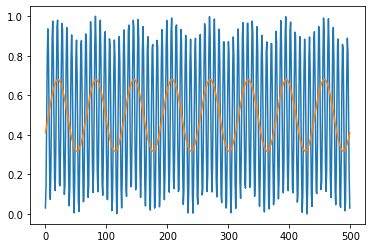

In [32]:
plt.plot(val_dict['128'][0,:,32,32], label = '1')
plt.plot(val_dict['128'][0,:,64,64], label = '1')

In [14]:
%load_ext autoreload
%autoreload 2

torch.Size([10, 500, 1, 1])
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([10, 500, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


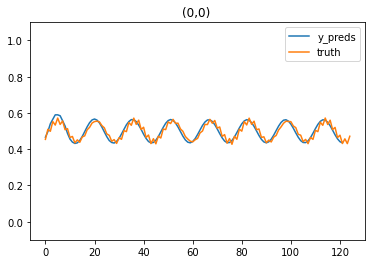

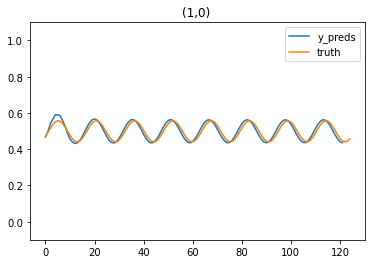

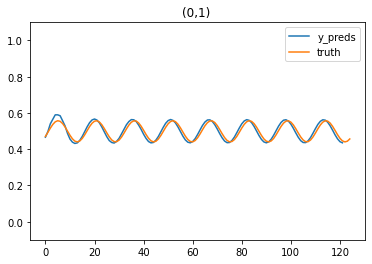

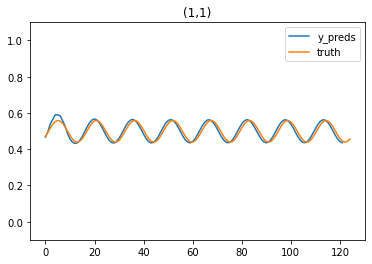

(2, 2)
[[0.0003759  0.00023361]
 [0.00023361 0.00023309]]


In [34]:
import utils
print(val_dict['1'].shape)
resolved, loss, unresolved_list = utils.find_error_4(val_dict['1'], models[idx_lowest], val_dict['2'], plot = True,tol=0.0002)
print(loss.shape)
print(loss)



In [35]:

unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)

print(unresolved_list)

tensor([[1., 1.],
        [1., 1.]])


/tmp/ipykernel_950/3110518613.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)


torch.Size([100, 500, 2, 2])


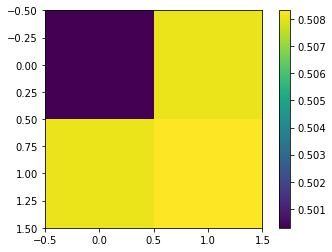

In [36]:
current_size = 1
next_train_data = unresolved_list * train_dict[str(current_size*2)]
print(next_train_data.shape)
plt.imshow(next_train_data[0,0])
plt.colorbar()
plt.show()

In [37]:
model_keep = [models[idx_lowest]]
model_used_dict[str(current_size)] = [[0]]

print(model_used_dict)

{'1': [[0]]}


In [41]:
import utils

current_size = 2
next_train_data = unresolved_list * train_dict[str(current_size)]

model_idx_list = np.ones((current_size, current_size))*(-1) #start with all -1

for i in range(current_size):
    for j in range(current_size):
        print("i = ", i, ": j = ", j)
        data_this = next_train_data[:,:,i,j]
        if (torch.min(data_this) == 0) and (torch.max(data_this) == 0):
            print("zero, no need to train")
            #don't need to do anything is model is resolved
            continue
        else:
        #see if the error is low enough on already made model
            for m, model in enumerate(model_keep):
                loss, resolved = utils.find_error_1(data_this, model,tol=0.0002)
                step_size = model.step_size
                print("model ", m, " has loss = ", loss)
                if resolved:
                    model_idx_list[i,j] = m
                    print("Resolved with loss = ", loss, ": model #", m)
                    break
                else:
                    pass
            if not resolved:
                print("not resolved, fitting new model")
                k = int(np.log2(step_size))
                #if no model good, train new model
                models, step_sizes, mse_list, idx_lowest, n_forward_list = utils.find_best_timestep(train_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir,#make_new = True,
                                                              i=i, j=j, start_k = 2, largest_k = 3)#, dont_train=False)
                
                model_keep.append(models[idx_lowest])
                model_idx_list[i,j] = len(model_keep)-1
model_used_dict[str(current_size)] = model_idx_list

i =  0 : j =  0
model  0  has loss =  0.0005059755523689092
not resolved, fitting new model
inside train_one_timestep
model loaded:  model_L2_D4_noise0_i0_j0.pt
Model not trained more
i =  0 : j =  1
model  0  has loss =  0.000211473009949259
model  1  has loss =  0.00019067373759753536
Resolved with loss =  0.00019067373759753536 : model # 1
i =  1 : j =  0
model  0  has loss =  0.00021147410880075767
model  1  has loss =  0.00019067426583205816
Resolved with loss =  0.00019067426583205816 : model # 1
i =  1 : j =  1
model  0  has loss =  0.00022249813500820891
model  1  has loss =  0.00021268004802550423
not resolved, fitting new model
inside train_one_timestep
create model ../model/toy3b/model_L2_D4_noise0_i1_j1.pt ...
data shape =  torch.Size([100, 500, 1, 1])
data shape =  torch.Size([10, 500, 1, 1])
epoch  100 : train_error:  0.001621647 : val_loss  0.0016032993 : min_val_loss  100000.0
Model improved. Saved at epoch =  100
epoch  200 : train_error:  0.001533074 : val_loss  0.001

In [42]:
print(model_idx_list)
print(len(model_keep))
print(model_used_dict)

[[1. 1.]
 [1. 2.]]
3
{'1': [[0]], '2': array([[1., 1.],
       [1., 2.]])}


1.0
../model/toy3b/model_L2_D4_noise0_i0_j0.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


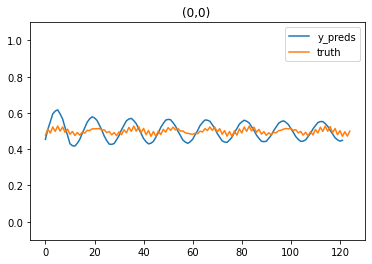

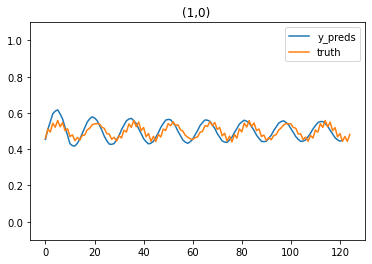

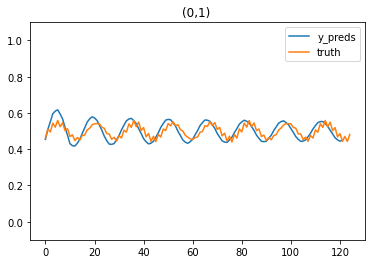

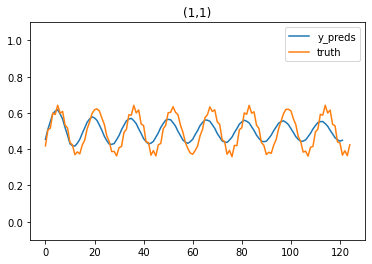

[[0.0011196  0.00051438]
 [0.00051438 0.00321057]]
tensor([[1., 1.],
        [1., 1.]])
1.0
../model/toy3b/model_L2_D4_noise0_i0_j0.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


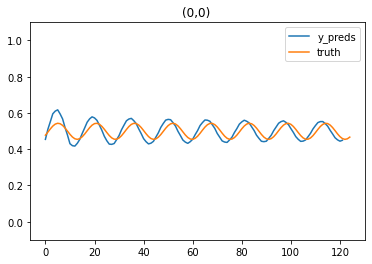

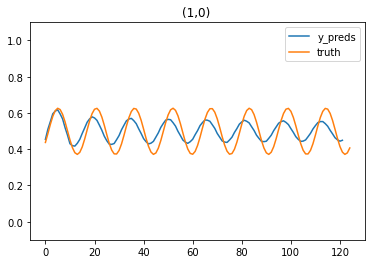

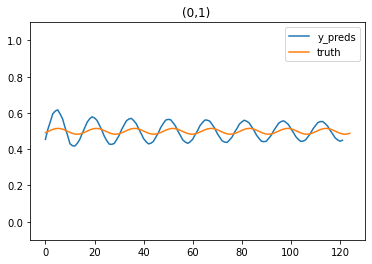

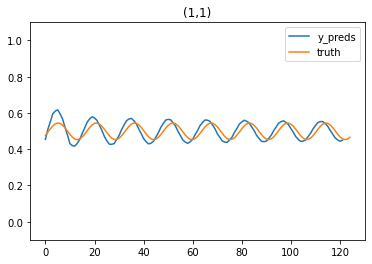

[[0.00037322 0.00099373]
 [0.00317622 0.00036309]]
tensor([[1., 1.],
        [1., 1.]])
1.0
../model/toy3b/model_L2_D4_noise0_i0_j0.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


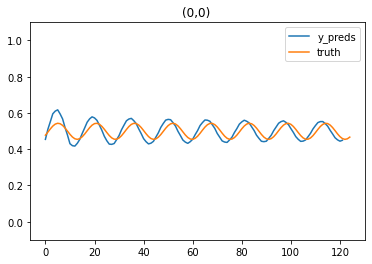

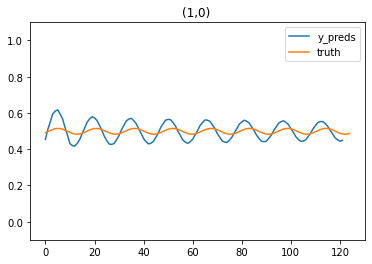

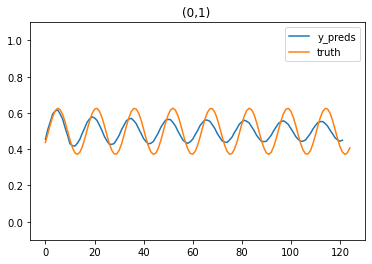

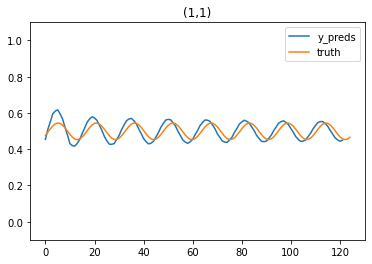

[[0.00037322 0.00317622]
 [0.00099373 0.00036309]]
tensor([[1., 1.],
        [1., 1.]])
2.0
../model/toy3b/model_L2_D4_noise0_i1_j1.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


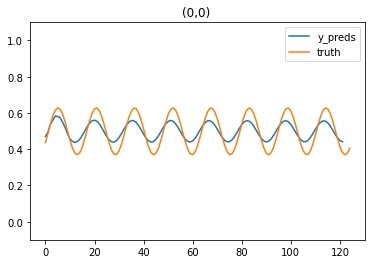

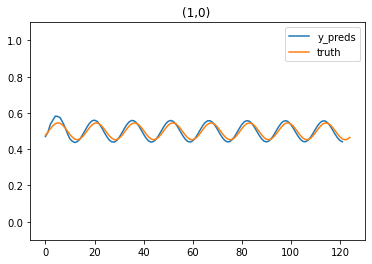

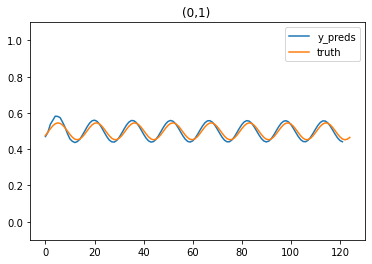

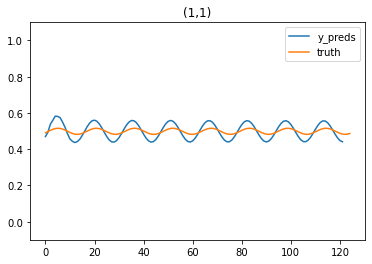

[[0.00301867 0.00027394]
 [0.00027394 0.00096371]]
tensor([[1., 1.],
        [1., 1.]])
all_resolved =  False
unresolved_list_big =  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [44]:
import utils
tol = 0.0002
#once we have all 4 figured out, need to check the errors on the 2x2 of the 2x2s (the 4x4)
unresolved_list_big = np.ones((4,4))*(-1)
all_resolved = True
for i in range(2):
    for j in range(2):
        print(model_used_dict['2'][i][j])
        model = model_keep[int(model_used_dict['2'][i][j])]
        print(model.model_name)
        data_next = val_dict['4'][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size]
        resolved, loss, unresolved_list = utils.find_error_4(val_dict['2'][i,j], model, data_next,plot = True, tol=tol)
        unresolved_list_big[i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size] = unresolved_list
        if not resolved:
            all_resolved = False
        print(loss)
        print(unresolved_list)
print("all_resolved = ", all_resolved)
print("unresolved_list_big = ", unresolved_list_big)

In [ ]:
#doing next refine, should be perfect here. 
import utils


current_size = 4
print("unresolved_list = ", unresolved_list)
next_train_data = torch.tensor(unresolved_list_big) * train_dict[str(current_size)]

model_idx_list = np.ones((current_size, current_size))*(-1) #start with all -1

for i in range(current_size):
    for j in range(current_size):
        print("i = ", i, ": j = ", j)
        data_this = next_train_data[:,:,i,j]
        if (torch.min(data_this) == 0) and (torch.max(data_this) == 0):
            print("zero, no need to train")
            #don't need to do anything is model is resolved
            continue
        else:
        #see if the error is low enough on already made model
            for m, model in enumerate(model_keep):
                loss, resolved = utils.find_error_1(data_this, model)
                step_size = model.step_size
                print("model ", m, " has loss = ", loss)
                if resolved:
                    model_idx_list[i,j] = m
                    print("Resolved with loss = ", loss, ": model #", m)
                    break
                else:
                    pass
            if not resolved:
                print("not resolved, fitting new model")
                k = int(np.log2(step_size))
                #if no model good, train new model
                models, step_sizes, mse_list, idx_lowest, n_forward_list = utils.find_best_timestep(train_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir,#make_new = True,
                                                              i=i, j=j, start_k = max(0,k-1), largest_k = k+2)#, dont_train=False)
                
                model_keep.append(models[idx_lowest])
                model_idx_list[i,j] = len(model_keep)-1
model_used_dict[str(current_size)] = model_idx_list

In [ ]:
print(model_idx_list)
print(len(model_keep))
print(model_used_dict)

import utils
tol = 2.5e-2
#once we have all 4 figured out, need to check the errors on the 2x2 of the 2x2s (the 4x4)
unresolved_list_big = np.ones((current_size, current_size))*(-1)
all_resolved = True
for i in range(1):
    for j in range(1):
        print(model_used_dict[str(current_size)][i][j])
        model = model_keep[int(model_used_dict[str(current_size)][i][j])]
        print(model.model_name)
        data_next = val_dict[str(current_size)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size]
        print("data next shape = ", data_next.shape)
        resolved, loss, unresolved_list = utils.find_error_4(val_dict[str(current_size)][i,j], model, data_next,plot = True, tol=tol)
        unresolved_list_big[i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size] = unresolved_list
        if not resolved:
            all_resolved = False
        print(loss)
        print("unresolved_list= ", unresolved_list)
print("all_resolved = ", all_resolved)
print("unresolved_list_big = ", unresolved_list_big)

In [ ]:
import utils
model_slow = model_keep[3]
data = val_dict['2'][:,:, 1,1]
utils.find_error_1(data, model_slow, tol=2e-2, plot=True, title="Slow timescale")

model_slow = model_keep[0]
data = val_dict['1'][:,:, 0,0]
utils.find_error_1(data, model_slow, tol=2e-2, plot=True, title="step 1")


model_slow = model_keep[1]
data = val_dict['2'][:,:, 0,0]
utils.find_error_1(data, model_slow, tol=2e-2, plot=True, title="step 2 on split block")

model_fast = model_keep[6]
data = val_dict['4'][:,:, 1,1]
utils.find_error_1(data, model_fast, tol=2e-2, plot=True, title = "Fast timescale")

In [ ]:
print(step_sizes, mse_list, idx_lowest)
resolved, loss, unresolved_list = utils.find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               models[idx_lowest], 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)    

In [ ]:
model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()

In [ ]:
plt.imshow(val_dict[str(current_size*2)][0,0])
plt.colorbar()

In [ ]:
step_size = (16+32)/2
print(step_size)
model = train_one_timestep(int(28), train_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), current_size)
#                        dt = 1, n_forward = 5, noise=0, make_new = False, dont_train = True, 
#                        lr = 1e-3, max_epochs = 10000, batch_size = 50,threshold = 1e-4, 
#                        model_dir = './models/toy2',i=None, j = None):
    
#     train_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir, 
#                                                               i=i, j=j, start_k = max(0,k-1), largest_k = k+2)

In [ ]:
i = 0
j = 1
resolved, loss, unresolved_list = find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               model, 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)

In [ ]:
# model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()